# k-Nearest Neighbors (kNN) and the Iris Dataset

<img src="http://www.wpclipart.com/plants/diagrams/plant_parts/petal_sepal_label.png" 
 style="height: 170px;"/ align=left>
<img src="http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png"
 style="height: 170px;"/ align=right>

This exercise involves Fisher's iris dataset. Although you could technically do your data mining without knowing what an iris is, it is definitely recommended that you'd make yourself a little familiar with the subject. 
(Recall that data science = math + coding + domain knowledge.) For now, though, looking at the above pictures is probably enough.

### Import data

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('http://www.stat.cmu.edu/~rnugent/PUBLIC/teaching/CMU729/HW/iris.txt',sep=' ')
data.columns =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
len(data)

150

In [8]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
dtype: int64

So we have three kinds of irises, and 50 samples of each.

### Exploring data

- We would like to classify the irises into one of these three species, based on the four given features.
- First have a look at some basic statistics and visualizations.

In [9]:
features = data.columns.tolist()[:-1]
species = data.species.unique()
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [10]:
# Average sizes per feature per species
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [11]:
#Good, but lets get some more stats
data.groupby('species').agg(['mean','min','max'])

sepal_length           sepal_width           petal_length       \
                   mean  min  max        mean  min  max         mean  min   
species                                                                     
setosa            5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0   
versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260  3.0   
virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552  4.5   

                petal_width            
            max        mean  min  max  
species                                
setosa      1.9       0.246  0.1  0.6  
versicolor  5.1       1.326  1.0  1.8  
virginica   6.9       2.026  1.4  2.5

- Let's make some plots

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

# Set up color labeling
colors = pd.Series(['y', 'r', 'b'], index=species)
colors

setosa        y
versicolor    r
virginica     b
dtype: object

In [2]:
# Sepal: length vs width
x_feature, y_feature = 'sepal_length', 'sepal_width'
for spec in species:
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x_feature], data_spec[y_feature], c=colors[spec], label=spec,
                linewidths=0, s=50, alpha=.8)
    plt.xlabel('sepal_length'), plt.ylabel('sepal_width')
f = plt.legend()

NameError: name 'species' is not defined

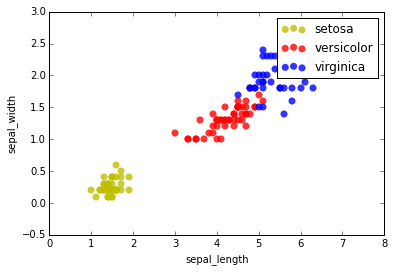

In [14]:
# Petal: length vs width
x_feature, y_feature = 'petal_length', 'petal_width'
for spec in species:
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x_feature], data_spec[y_feature], c=colors[spec], label=spec,
                linewidths=0, s=50, alpha=.8)
    plt.xlabel('sepal_length'), plt.ylabel('sepal_width')
f = plt.legend()

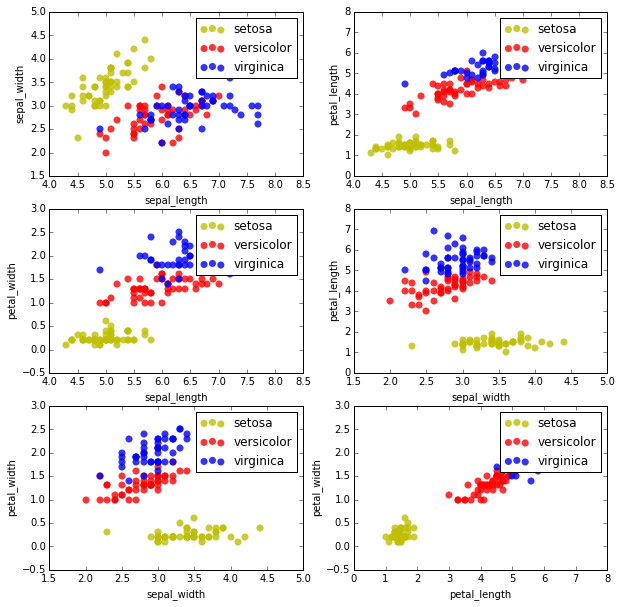

In [15]:
# Hmm...lets try all the things!
import itertools

plt.figure(figsize=(10,10))
for idx, val in enumerate(itertools.combinations(features,2)):
    x_feature, y_feature = val
    plt.subplot(3,2,idx+1)
    for spec in species:
        data_spec = data[data.species == spec]
        plt.scatter(data_spec[x_feature], data_spec[y_feature], c=colors[spec], label=spec,
                linewidths=0, s=50, alpha=.8)
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
    f = plt.legend()

### Apply kNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier  # Import the KNN algorithm from sk-learn.

In [17]:
model = KNeighborsClassifier(n_neighbors=5)  # init kNN, with k=5

In [18]:
X = data[features]  # put our features in a separate matrix, this is the 'input'
y = data.species  # these are the labels we would like to predict

In [19]:
model.fit(X, y)  # fit the model to the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

Let's take our first sample and see if it predicts that one correctly

In [20]:
# What are the features of the first few samples?
X.head()

,sepal_length,sepal_width,petal_length,petal_width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [21]:
# What was the label of our first sample?
y.head()

1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object

In [22]:
# What does our model predict it would be?
model.predict(X.head(1))

array(['setosa'], dtype=object)

In [23]:
#What does the model predict for all the samples?
y_pred = model.predict(X)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

- What is the accuracy for the entire dataset? How many % of samples can we predict correctly?

In [24]:
model.score(X, y)

0.96666666666666667

## Exercise

97% Correct. Not bad...but is the above number correct? Let's try to calculate it ourselves.

**1) First, predict y using `model.predict`, and save it to y_pred**

In [33]:
model.fit(X,y)
y_pred = model.predict(X) 
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

Our quality measure, will be #Predictions correct / Total # Predictions.

**2) Calculate this quality measure now. It may be beneficial to use np.sum. Check that the resulting number is the same**



In [34]:
np.sum( y_pred == y) / np.float64(len(y)) 


1.0

- However, this number is because we tested on the training set. The above method could be seen as cheating, since we had given all answers to the model to start with. 

**3) To illustrate this, try the process of fitting, predicting, and scoring using $k=1$ and see what happens.**

In [35]:
model = KNeighborsClassifier(n_neighbors=1)  # init kNN, with k=5
model.fit(X,y) 
model.score(X,y) 

1.0

### Train vs Test Set

- Wow, 100% accuracy! Why do you think that is?
- Does this mean that our model performs better when we choose $k = 1$ than with the $k$ we chose earlier?

- To avoid this problem, we split up the dataset in a **training set** for fitting the model, and a **test set** for testing the model.

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)  # Use 80% of the data for training

(30, 4)


In [39]:
model = KNeighborsClassifier(n_neighbors=1)  # Let's do the extreme case of k=1 first
model.fit(X_train, y_train)


print "Accuracy on training set:", model.score(X_train, y_train)

print "Accuracy on test set:    ", model.score(X_test, y_test)

Accuracy on training set: 1.0
Accuracy on test set:     0.966666666667


In [40]:
model = KNeighborsClassifier(n_neighbors=20)  # Let's try with a lot more neighbors
model.fit(X_train, y_train)


print "Accuracy on training set", model.score(X_train, y_train)


print "Accuracy on test set:   ", model.score(X_test, y_test)

Accuracy on training set 0.958333333333
Accuracy on test set:    0.933333333333


## Exercise

Let's get a rough idea of how our training and test error changes as a function of $k$.

**1) Create two arrays. Call them trainScore and testScore respectively.**

In [62]:
trainScore = []
testScore  = []

**2) Split up the dataset into X_train, X_test, y_train, y_test as we did above using train_size = .7**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)  # Use 70% of the data for training

**2) For $k = 1, 2, 3, ..., 70$, fit a model using the particular value of k. Append the score on the training set to $trainScore$, and append the score on the test set to $testScore$ respectively.**

In [64]:
for k in range(1,71):
    model = KNeighborsClassifier(n_neighbors=k)  # Let's try with a lot more neighbors
    model.fit(X_train, y_train)
    
    
    trainScore.append( model.score(X_train,y_train) )
    testScore.append( model.score( X_test, y_test) )

**3) Plot both trainScore and testScore on a single plot. You can call plt.plot and pass in your arrays twice**

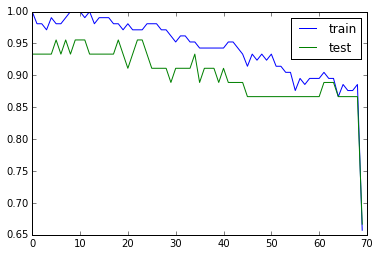

In [65]:

plt.plot(trainScore)
plt.plot(testScore)
plt.legend(['train','test']) 

If you run the above sections of code a few times, you might see that your plots will change a lot. Generally, as you increase 'k', the training score will decrease, while test score will increase. At a certain point, they will both start to decrease. This is due to a bias-variance tradeoff that we will explore later on. 

Attempting to choose the best $k$ using our current setup will lead to bias in our results. Why is that? Imagine that we keep the train and test set constant and we only vary k. If we try to choose the best k based on what gives us the highest test score, then we've only really picked the best k for THIS split of data. We will also explore solutions to reducing this issue through cross-validation. 

## Exercises

#### Applying kNN

For the oenophiles out there, let's try to classify some wines based on some qualities about the wine. First download the following dataset, and use the column_names attribute to set the column names.
```
column_names = ['wine','alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280','proline']

x = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=column_names)
```



**How many samples of each class are there?**

**Print out some descriptive stats (mean,min,max) of each column by each class.**

**Split out the wine dataset into an X train matrix, X test matrix, y train array, y test array. Use 80% of the dataset for training**

**Initialize knn on 5 neighbors, and generate the train and test scores**

**Try a few other values of k. How does your model compare?**

**Try removing a few features. How does your model compare?**

# Advanced Exercise: Implementing kNN yourself

Goal of this exercise is to write the entire kNN algorithm yourself in python. This is a great exercise for those students who'd like to master the math *and* coding behind the algorithm.
- The code below has defined a kNN class with empty functions.
- Review the code. There are three methods that you need to complete: `fit`, `predict` and `score`.
- Compare this implementation with the sklearn implementation.

In [ ]:
class kNN(object):
    """
    Class for simple k-Nearest Neighbors
    """

    def __init__(self, k=5):
        """
        Initialize model.
        :param k: number of Neighbors (the 'k' in kNN)
        """
        self.k = k

    def fit(self, X, y):
        """
        Fit model.
        :param X: pandas dataframe or numpy ndarray with features
        :param y: pandas series or numpy ndarray with classes
        """
        raise NotImplementedError

    def predict(self, X):
        """
        Predict classes of samples.
        :param X: pandas dataframe or numpy ndarray with features
        """
        raise NotImplementedError

    def score(self, X, y):
        """
        Compute accuracy of predictions on X.
        :param X: pandas dataframe or numpy ndarray with features
        :param y: pandas series or numpy ndarray with true classes
        """
        raise NotImplementedError


In [ ]:
# Example Usage:
model = knn.kNN(k=15)
model.fit(X, y)
model.score(X, y)